In [1]:
from model import optimize_beds
import pandas as pd
from tqdm import tqdm

In [10]:
print("Objetivo 1")
general_metrics, metrics_by_block = optimize_beds(130, 100, [-1, 0, 0])
peor_objetivo_1 = general_metrics["objective_1"]
print(general_metrics)
# Peor caso: 3E4 aprox / 2.75E4
# {'total_distance': 27585, 'beds_changed': 18, 'not_ideal': 339, 'status': 2, 'objetivo_1': 27585.0, 'objetivo_2': 71.0, 'objetivo_3': 339.0}

general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 0, 0])
mejor_objetivo_1 = general_metrics["objective_1"]
print(general_metrics)
# Mejor caso: 8.3E3
# {'total_distance': 8365, 'beds_changed': 20, 'not_ideal': 330, 'status': 2, 'objetivo_1': 8365.0, 'objetivo_2': 69.0, 'objetivo_3': 330.0}

Objetivo 1


In [ ]:
print("Objetivo 2")
general_metrics, metrics_by_block = optimize_beds(130, 100, [0, -1, 0])
print(general_metrics)
peor_objetivo_2 = general_metrics["objective_2"]

# Peor caso: 1.290000000000e+02
# {'total_distance': 20495, 'beds_changed': 20, 'not_ideal': 359, 'status': 2, 'objetivo_1': 20495.0, 'objetivo_2': 129.0, 'objetivo_3': 359.0}

general_metrics, metrics_by_block = optimize_beds(130, 100, [0, 1, 0])
print(general_metrics)
mejor_objetivo_2 = general_metrics["objective_2"]
# Mejor caso: 0
# {'total_distance': 18980, 'beds_changed': 1, 'not_ideal': 358, 'status': 2, 'objetivo_1': 18980.0, 'objetivo_2': 0.0, 'objetivo_3': 358.0}

In [ ]:
print("Objetivo 3")
general_metrics, metrics_by_block = optimize_beds(130, 100, [0, 0, -1])
print(general_metrics)
peor_objetivo_3 = general_metrics["objective_3"]
# Peor caso: 686.0
# {'total_distance': 20735, 'beds_changed': 18, 'not_ideal': 686, 'status': 2, 'objetivo_1': 20735.0, 'objetivo_2': 78.0, 'objetivo_3': 686.0}

general_metrics, metrics_by_block = optimize_beds(130, 100, [0, 0, 1])
print(general_metrics)
mejor_objetivo_3 = general_metrics["objective_3"]
# Mejor caso: 24.0
# {'total_distance': 19210, 'beds_changed': 20, 'not_ideal': 24, 'status': 2, 'objetivo_1': 19210.0, 'objetivo_2': 75.0, 'objetivo_3': 24.0}

In [1]:
D = [
    [0, 5, 40, 35, 30, 25, 25, 15],
    [5, 0, 35, 30, 25, 10, 20, 10],
    [40, 35, 0, 5, 20, 30, 15, 25],
    [35, 30, 5, 0, 15, 25, 10, 20],
    [30, 25, 20, 15, 0, 15, 25, 35],
    [25, 10, 30, 25, 15, 0, 15, 20],
    [25, 20, 15, 10, 25, 15, 0, 10],
    [15, 10, 25, 20, 35, 20, 10, 0]
] 
prom = sum(j for i in D for j in i) / (len(D) * len(D[0])) 
print(f"Promedio de cambio objective 1 : {prom}") 
print(f"Promedio de cambio objective 2: {4}")
print(f"Promedio de cambio objective 3: {1}")
print()
print(f"Iterador ajustado: {1}")
print(f"Iterador ajustado: {prom / 4}")
print(f"Iterador ajustado: {prom / 1}" )

Promedio de cambio objective 1 : 18.4375
Promedio de cambio objective 2: 4
Promedio de cambio objective 3: 1

Iterador ajustado: 1
Iterador ajustado: 4.609375
Iterador ajustado: 18.4375


Asumiendo que W1 = 1, se calculara un ponderador para que `prom_obj_2 * w_2 = prom_obj_1`, calculamos a continuacion los pesos.

In [13]:
print("W2:", (mejor_objetivo_1 + peor_objetivo_1) / (mejor_objetivo_2 + peor_objetivo_2))
print("W3:", (mejor_objetivo_1 + peor_objetivo_1) / (mejor_objetivo_3 + peor_objetivo_3))

W2: 278.6821705426357
W1: 50.63380281690141


Se puede concluir que estos son los pesos para que cada funcion sea igual de importante.


In [2]:
general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 277, 50])
metricas_ajuste = general_metrics
print(general_metrics)

general_metrics, metrics_by_block = optimize_beds(130, 100, [10, 3, 7])
metricas_sin_ajuste = general_metrics
print(general_metrics)

{'total_distance': 11700, 'beds_changed': 0, 'not_ideal': 69, 'status': 2, 'objective_1': 11700.0, 'objective_2': 0.0, 'objective_3': 69.0}
{'total_distance': 8365, 'beds_changed': 5, 'not_ideal': 230, 'status': 2, 'objective_1': 8365.0, 'objective_2': 9.0, 'objective_3': 230.0}


In [11]:
print(metricas_ajuste)
print()
print(metricas_sin_ajuste)

{'total_distance': 11700, 'beds_changed': 1, 'not_ideal': 69, 'status': 2, 'objective_1': 11700.0, 'objective_2': 0.0, 'objective_3': 69.0}

{'total_distance': 8365, 'beds_changed': 6, 'not_ideal': 229, 'status': 2, 'objective_1': 8365.0, 'objective_2': 12.0, 'objective_3': 229.0}


In [2]:
for i in range(0, 30, 4):
    for j in range(0, 37, 18):
        general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 277 - i, 50 - j])
        # 277 - i : i E [0, 28, 4]
        # 50 - j : j E [0, 36, 18]
        total_distance = general_metrics["total_distance"]
        beds_changed = general_metrics["beds_changed"]
        not_ideal = general_metrics["not_ideal"]
        print(f"w1: {1}, w2: {277 - i}, w3: {50 - j}, {total_distance=}, {beds_changed=}, {not_ideal=}")
        print()

w1: 1, w2: 277, w3: 50, total_distance=11700, beds_changed=0, not_ideal=69

w1: 1, w2: 277, w3: 32, total_distance=10065, beds_changed=0, not_ideal=108

w1: 1, w2: 277, w3: 14, total_distance=8985, beds_changed=0, not_ideal=178

w1: 1, w2: 273, w3: 50, total_distance=11700, beds_changed=0, not_ideal=69

w1: 1, w2: 273, w3: 32, total_distance=10065, beds_changed=0, not_ideal=108

w1: 1, w2: 273, w3: 14, total_distance=8985, beds_changed=0, not_ideal=178

w1: 1, w2: 269, w3: 50, total_distance=11700, beds_changed=0, not_ideal=69

w1: 1, w2: 269, w3: 32, total_distance=10065, beds_changed=0, not_ideal=108

w1: 1, w2: 269, w3: 14, total_distance=8985, beds_changed=0, not_ideal=178

w1: 1, w2: 265, w3: 50, total_distance=11700, beds_changed=0, not_ideal=69

w1: 1, w2: 265, w3: 32, total_distance=10065, beds_changed=0, not_ideal=108

w1: 1, w2: 265, w3: 14, total_distance=8985, beds_changed=0, not_ideal=178

w1: 1, w2: 261, w3: 50, total_distance=11700, beds_changed=0, not_ideal=69

w1: 1, w

Se puede apreciar que el promedio no fue un buen criterio para igualar los pesos, se le da mucha prioridad a que hayan pocos cambios de cama, y el cambio drástico en los cambios del peso 3.

In [3]:
for i in range(0, 31, 10):
    for j in range(0, 31, 5): 
        general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 200 - i, 100 - j])
        total_distance = general_metrics["total_distance"]
        beds_changed = general_metrics["beds_changed"]
        not_ideal = general_metrics["not_ideal"]
        print(f"w1: {1}, w2: {200 - i}, w3: {100 - j}, {total_distance=}, {beds_changed=}, {not_ideal=}")
        print()

w1: 1, w2: 200, w3: 100, total_distance=14545, beds_changed=0, not_ideal=24

w1: 1, w2: 200, w3: 95, total_distance=14545, beds_changed=0, not_ideal=24

w1: 1, w2: 200, w3: 90, total_distance=14545, beds_changed=0, not_ideal=24

w1: 1, w2: 200, w3: 85, total_distance=14545, beds_changed=0, not_ideal=24

w1: 1, w2: 200, w3: 80, total_distance=14545, beds_changed=0, not_ideal=24

w1: 1, w2: 200, w3: 75, total_distance=14545, beds_changed=0, not_ideal=24

w1: 1, w2: 200, w3: 70, total_distance=13645, beds_changed=0, not_ideal=36

w1: 1, w2: 190, w3: 100, total_distance=14545, beds_changed=0, not_ideal=24

w1: 1, w2: 190, w3: 95, total_distance=14545, beds_changed=0, not_ideal=24

w1: 1, w2: 190, w3: 90, total_distance=14545, beds_changed=0, not_ideal=24

w1: 1, w2: 190, w3: 85, total_distance=14545, beds_changed=0, not_ideal=24

w1: 1, w2: 190, w3: 80, total_distance=14545, beds_changed=0, not_ideal=24

w1: 1, w2: 190, w3: 75, total_distance=14545, beds_changed=0, not_ideal=24

w1: 1, w2:

Podemos notar que la funcion 2 sigue con mucha prioridad, la funcion 3 tambien gano harta prioridad, pero los cambios ya no son tan drasticos, procederemos a bajar las constantes de peso

In [4]:
for i in range(0, 31, 10):
    for j in range(0, 31, 5):
        general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 100 - i, 70 - j])
        total_distance = general_metrics["total_distance"]
        beds_changed = general_metrics["beds_changed"]
        not_ideal = general_metrics["not_ideal"]
        print(f"w1: {1}, w2: {100 - i}, w3: {70 - j}, {total_distance=}, {beds_changed=}, {not_ideal=}")
        print()

w1: 1, w2: 100, w3: 70, total_distance=13645, beds_changed=0, not_ideal=36

w1: 1, w2: 100, w3: 65, total_distance=13645, beds_changed=0, not_ideal=36

w1: 1, w2: 100, w3: 60, total_distance=12360, beds_changed=0, not_ideal=57

w1: 1, w2: 100, w3: 55, total_distance=11700, beds_changed=0, not_ideal=69

w1: 1, w2: 100, w3: 50, total_distance=11700, beds_changed=0, not_ideal=69

w1: 1, w2: 100, w3: 45, total_distance=10670, beds_changed=0, not_ideal=91



In [2]:
# ADVERTENCIA, NO CORRER
# SE DEMORA COMO 7 HORAS EN CORRER TODOS ESTOS CASOS Y SE PERDERÁ EL OUTPUT DE ABAJO

for i in range(0, 51, 5):
    for j in range(0, 51, 5):
        general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 200 - i, 60 - j])
        total_distance = general_metrics["total_distance"]
        beds_changed = general_metrics["beds_changed"]
        not_ideal = general_metrics["not_ideal"]
        print(f"w1: {1}, w2: {50 - i}, w3: {60 - j}, {total_distance=}, {beds_changed=}, {not_ideal=}")
        print()

w1: 1, w2: 50, w3: 60, total_distance=12360, beds_changed=0, not_ideal=57

w1: 1, w2: 50, w3: 55, total_distance=11700, beds_changed=0, not_ideal=69

w1: 1, w2: 50, w3: 50, total_distance=11700, beds_changed=0, not_ideal=69

w1: 1, w2: 50, w3: 45, total_distance=10670, beds_changed=0, not_ideal=91

w1: 1, w2: 50, w3: 40, total_distance=10670, beds_changed=0, not_ideal=91

w1: 1, w2: 50, w3: 35, total_distance=10375, beds_changed=0, not_ideal=99

w1: 1, w2: 50, w3: 30, total_distance=10065, beds_changed=0, not_ideal=108

w1: 1, w2: 50, w3: 25, total_distance=10065, beds_changed=0, not_ideal=108

w1: 1, w2: 50, w3: 20, total_distance=9920, beds_changed=0, not_ideal=115

w1: 1, w2: 50, w3: 15, total_distance=9485, beds_changed=0, not_ideal=144

w1: 1, w2: 50, w3: 10, total_distance=8650, beds_changed=0, not_ideal=209

w1: 1, w2: 45, w3: 60, total_distance=12360, beds_changed=0, not_ideal=57

w1: 1, w2: 45, w3: 55, total_distance=11700, beds_changed=0, not_ideal=69

w1: 1, w2: 45, w3: 50, 

In [2]:
# No correr, se demora como 5 horas
# Por fa, no lo corran D:

datos = []
for i in range(0, 6)[::-1]:
    for j in range(20, 51, 5):
        general_metrics, metrics_by_block = optimize_beds(130, 100, [1, i, j])
        total_distance = general_metrics["total_distance"]
        beds_changed = general_metrics["beds_changed"]
        not_ideal = general_metrics["not_ideal"]
        print(f"w1: {1}, w2: {i}, w3: {j}, {total_distance=}, {beds_changed=}, {not_ideal=}")
        datos.append((1, i, j, general_metrics, metrics_by_block))
        print()

w1: 1, w2: 5, w3: 20, total_distance=9935, beds_changed=2, not_ideal=108

w1: 1, w2: 5, w3: 25, total_distance=9935, beds_changed=2, not_ideal=108

w1: 1, w2: 5, w3: 30, total_distance=9935, beds_changed=2, not_ideal=108

w1: 1, w2: 5, w3: 35, total_distance=10385, beds_changed=3, not_ideal=93

w1: 1, w2: 5, w3: 40, total_distance=10920, beds_changed=4, not_ideal=79

w1: 1, w2: 5, w3: 45, total_distance=10895, beds_changed=5, not_ideal=79

w1: 1, w2: 5, w3: 50, total_distance=10895, beds_changed=5, not_ideal=79

w1: 1, w2: 4, w3: 20, total_distance=9935, beds_changed=2, not_ideal=108

w1: 1, w2: 4, w3: 25, total_distance=9935, beds_changed=2, not_ideal=108

w1: 1, w2: 4, w3: 30, total_distance=9935, beds_changed=2, not_ideal=108

w1: 1, w2: 4, w3: 35, total_distance=10385, beds_changed=3, not_ideal=93

w1: 1, w2: 4, w3: 40, total_distance=10895, beds_changed=5, not_ideal=79

w1: 1, w2: 4, w3: 45, total_distance=10895, beds_changed=5, not_ideal=79

w1: 1, w2: 4, w3: 50, total_distance=1

In [8]:
all_metrics = []
for w1, w2, w3, general_metrics, metrics_by_block in datos:
    general_metrics.update({"w1": w1, "w2": w2, "w3": w3})
    all_metrics.append(general_metrics )
metrics = pd.DataFrame(all_metrics)
metrics.to_csv("cost_analysis.csv")

In [9]:
metrics

,total_distance,beds_changed,not_ideal,status,objective_1,objective_2,objective_3,w1,w2,w3
0,9935,2,108,2,9935.00000,5.000000,108.0,1,5,20
1,9935,2,108,2,9935.00000,5.000000,108.0,1,5,25
2,9935,2,108,2,9935.00000,5.000000,108.0,1,5,30
3,10385,3,93,2,10385.00000,6.000000,93.0,1,5,35
4,10920,4,79,2,10919.99978,8.000000,79.0,1,5,40
5,10895,5,79,2,10895.00000,12.000000,79.0,1,5,45
6,10895,5,79,2,10895.00000,12.000000,79.0,1,5,50
7,9935,2,108,2,9935.00000,5.000000,108.0,1,4,20
8,9935,2,108,2,9935.00000,5.000000,108.0,1,4,25
9,9935,2,108,2,9935.00000,5.000000,108.0,1,4,30


In [11]:
all_metrics = []
for w1, w2, w3, general_metrics, metrics_by_block in datos:
    metrics_by_block.to_csv(f"analysis_per_blocks/metrics_by_block_{w1}_{w2}_{w3}.csv")

In [16]:
# 21 iteraciones, esperar para ver resultados
w1 = 4
datos = []
for i in range(1, 8): # [1, 2, 3, 4, 5, 6, 7]
    for j in range(15, 26, 5)[::-1]: # [15, 20, 25]
        general_metrics, metrics_by_block = optimize_beds(130, 90, [w1, i, j * w1 // 4])
        total_distance = general_metrics["total_distance"]
        beds_changed = general_metrics["beds_changed"]
        not_ideal = general_metrics["not_ideal"]
        print(f"w1: {w1}, w2: {i}, w3: {j * w1 // 4}, {total_distance=}, {beds_changed=}, {not_ideal=}")
        datos.append((w1, i, j * w1 // 4, general_metrics, metrics_by_block))
        print()

w1: 4, w2: 1, w3: 25, total_distance=7260, beds_changed=4, not_ideal=250

w1: 4, w2: 1, w3: 20, total_distance=7260, beds_changed=4, not_ideal=250

w1: 4, w2: 1, w3: 15, total_distance=7260, beds_changed=4, not_ideal=250

w1: 4, w2: 2, w3: 25, total_distance=7260, beds_changed=4, not_ideal=250

w1: 4, w2: 2, w3: 20, total_distance=7260, beds_changed=4, not_ideal=250

w1: 4, w2: 2, w3: 15, total_distance=7260, beds_changed=4, not_ideal=250

w1: 4, w2: 3, w3: 25, total_distance=7260, beds_changed=4, not_ideal=250

w1: 4, w2: 3, w3: 20, total_distance=7260, beds_changed=4, not_ideal=250

w1: 4, w2: 3, w3: 15, total_distance=7260, beds_changed=4, not_ideal=250

w1: 4, w2: 4, w3: 25, total_distance=7260, beds_changed=4, not_ideal=250

w1: 4, w2: 4, w3: 20, total_distance=7260, beds_changed=4, not_ideal=250

w1: 4, w2: 4, w3: 15, total_distance=7260, beds_changed=4, not_ideal=250

w1: 4, w2: 5, w3: 25, total_distance=7260, beds_changed=4, not_ideal=250

w1: 4, w2: 5, w3: 20, total_distance=7

In [2]:
general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 5, 20])
print(general_metrics)

{'total_distance': 9845, 'beds_changed': 20, 'not_ideal': 111, 'status': 2, 'objective_1': 9845.0, 'objective_2': 125.0, 'objective_3': 111.0}


In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme(palette="rocket")

In [7]:
def graphic_metrics_by_block(graph_metrics):
    # graph_metrics = pd.read_csv(f"analysis_per_blocks/metrics_by_block_{w1}_{w2}_{w3}.csv")
    fig, axes = plt.subplots(2, 2, sharex=True, figsize=(9, 9))
    fig.suptitle('Métricas durante el día')
    axes[0,0].set_title("Cambios por bloque")
    sns.lineplot(x="time", y="changes_per_block", data=graph_metrics, ax=axes[0, 0], linewidth=3)
    axes[1,1].set_title("Distancia por bloque")
    sns.lineplot(x="time", y="dist_per_block", data=graph_metrics, ax=axes[1, 1], linewidth=3)
    axes[0,1].set_title("Pacientes no ideales por bloque")
    sns.lineplot(x="time", y="not_ideals_per_block", data=graph_metrics, ax=axes[0, 1], linewidth=3)
    axes[1,0].set_title("Pacientes por bloque")
    sns.lineplot(x="time", y="patients_per_block", data=graph_metrics, ax=axes[1, 0], linewidth=3)

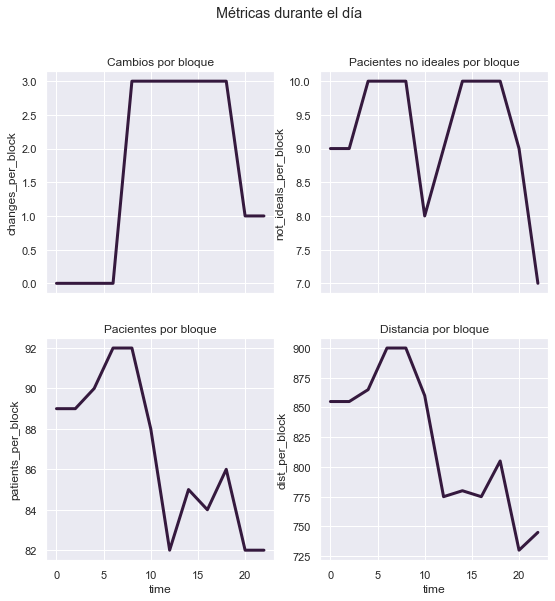

In [8]:
graphic_metrics_by_block(metrics_by_block)

{'total_distance': 9845, 'beds_changed': 20, 'not_ideal': 111, 'status': 2, 'objective_1': 9845.0, 'objective_2': 125.0, 'objective_3': 111.0}


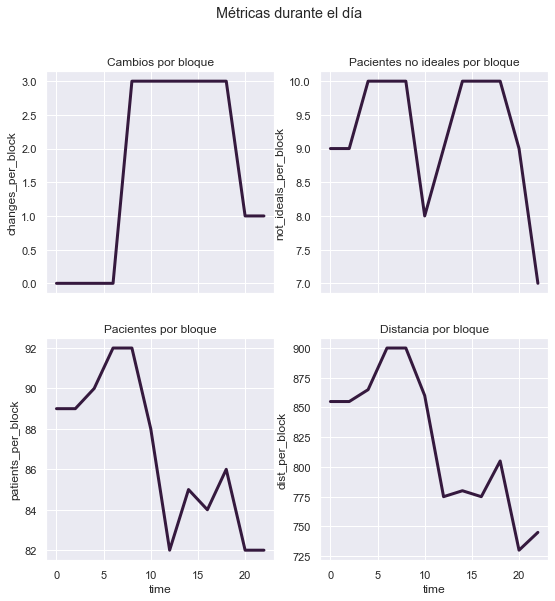

In [9]:
general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 1, 20])
print(general_metrics)
graphic_metrics_by_block(metrics_by_block)

In [ ]:
general_metrics, metrics_by_block = optimize_beds(130, 100, [1, 5, 20, 2])
print(general_metrics)
graphic_metrics_by_block(metrics_by_block)